In [22]:
import pandas as pd

In [23]:
data=pd.read_csv('bank.csv')

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
data.drop(['day','month','pdays',],axis=1,inplace=True)

In [30]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,30,10,1,primary,no,1787,no,no,cellular,79,1,0,unknown,no
1,33,7,1,secondary,no,4789,yes,yes,cellular,220,1,4,failure,no
2,35,4,2,tertiary,no,1350,yes,no,cellular,185,1,1,failure,no
3,30,4,1,tertiary,no,1476,yes,yes,unknown,199,4,0,unknown,no
4,59,1,1,secondary,no,0,yes,no,unknown,226,1,0,unknown,no


In [27]:
from  sklearn.preprocessing import LabelEncoder

In [28]:
data['job']=LabelEncoder().fit_transform(data['job'])

In [29]:
data['marital']=LabelEncoder().fit_transform(data['marital'])

In [32]:
data['education']=LabelEncoder().fit_transform(data['education'])
data['default']=LabelEncoder().fit_transform(data['default'])
data['housing']=LabelEncoder().fit_transform(data['housing'])
data['loan']=LabelEncoder().fit_transform(data['loan'])
data['contact']=LabelEncoder().fit_transform(data['contact'])
data['poutcome']=LabelEncoder().fit_transform(data['poutcome'])


In [33]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,79,1,0,3,no
1,33,7,1,1,0,4789,1,1,0,220,1,4,0,no
2,35,4,2,2,0,1350,1,0,0,185,1,1,0,no
3,30,4,1,2,0,1476,1,1,2,199,4,0,3,no
4,59,1,1,1,0,0,1,0,2,226,1,0,3,no


In [34]:
data['y']=LabelEncoder().fit_transform(data['y'])

In [35]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,79,1,0,3,0
1,33,7,1,1,0,4789,1,1,0,220,1,4,0,0
2,35,4,2,2,0,1350,1,0,0,185,1,1,0,0
3,30,4,1,2,0,1476,1,1,2,199,4,0,3,0
4,59,1,1,1,0,0,1,0,2,226,1,0,3,0


<Axes: >

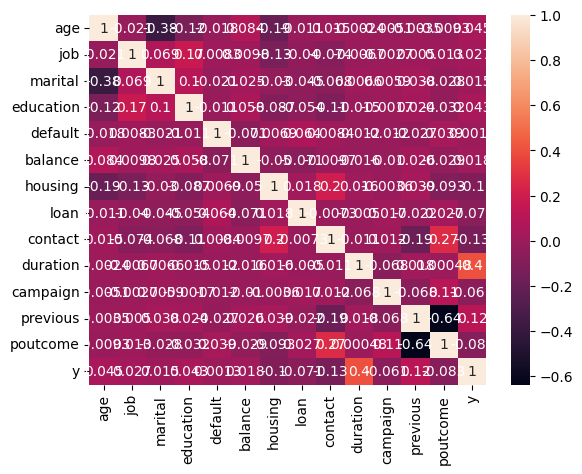

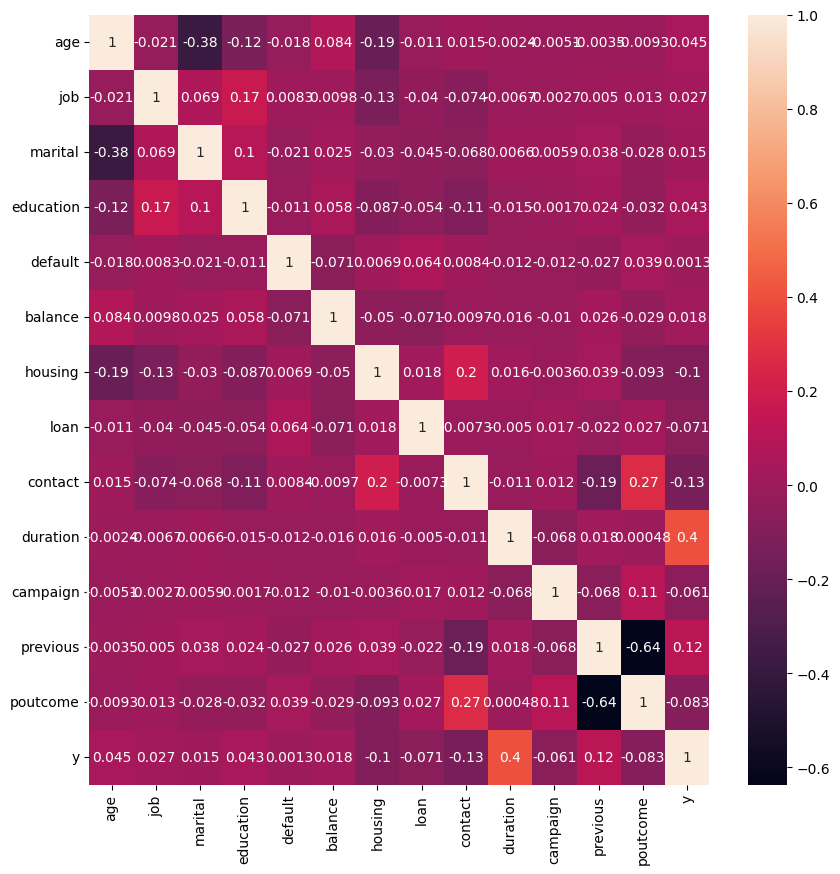

In [36]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns
sns.heatmap(corr,annot=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [40]:
features=data.drop('y',axis=1)
target=data['y']

In [42]:
from re import X
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
param_grid={'C':[0.01,1,100],'gamma':[1,0.1,0.01]}
grid=GridSearchCV(svc,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................................C=0.01, gamma=1; total time=   0.5s
[CV] END ....................................C=0.01, gamma=1; total time=   0.5s
[CV] END ....................................C=0.01, gamma=1; total time=   0.9s
[CV] END ....................................C=0.01, gamma=1; total time=   0.9s
[CV] END ....................................C=0.01, gamma=1; total time=   0.9s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.5s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.5s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.5s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.5s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.5s
[CV] END .................................C=0.01,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 100], 'gamma': [1, 0.1, 0.01]},
             verbose=2)

[[1006    0]
 [ 125    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1006
           1       0.00      0.00      0.00       125

    accuracy                           0.89      1131
   macro avg       0.44      0.50      0.47      1131
weighted avg       0.79      0.89      0.84      1131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


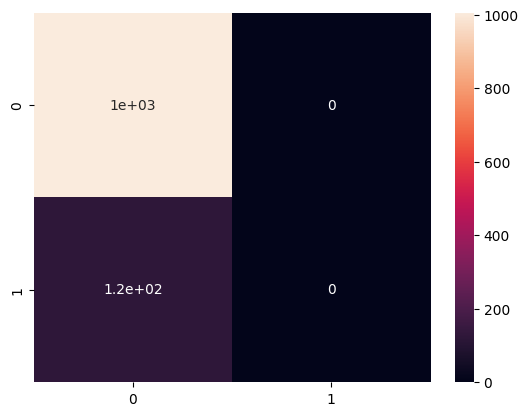

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True)
print(classification_report(y_test,grid_predictions))